In [12]:
%matplotlib inline
import os
import sys
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
import pdb
import h5py
import subprocess
import datetime
import pandas as pd
import copy

import platform
if platform.system() == 'Darwin':
    # On a Mac: usetex ok
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=True)
elif platform.node().startswith("D"):
    # On hyak: usetex not ok, must change backend to 'agg'
    mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)
    plt.switch_backend('agg')
else:
    # On astro machine or other linux: usetex not ok
    plt.switch_backend('agg')
    mpl.rc('font', family='Times New Roman')
    mpl.rcParams['font.size'] = 25.0
    mpl.rc('text', usetex=False)

In [13]:
import smart
import coronagraph as cg

In [14]:
sys.path.insert(1, "../scripts")

import spectroscopy

In [15]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 200
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True

In [16]:
drm1 = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = 0.2, 
    architecture = "B", 
    telescope_mods = {}
)

In [17]:
print(drm1.NBIAS)
print(drm1.Ndraw)

29
3


In [18]:
drm1.generate_exptime_table()

In [19]:
drm1.exptime_table.head(n=10)

,HIP,type,d [pc],UV 1,UV 2,UV 3,UV 4,UV 5,UV 6,vis 1,vis 2,vis 3,vis 4,NIR 1,NIR 2,NIR 3,NIR 4,Spec. Completeness
0,91772,K5,3.49174,7556.898771356197,115.30105818688882,9.296658210183065,2.5049567690549948,0.5605885712163582,0.822201684063192,4.6767365134395655,3.5495499015906367,4.637277033189163,2.1818360082351007,1.5467266434331253,1.6171091141824308,2.2127017494763486,6.228504328157806,1.0
1,1475,M1V,3.56201,3532376.7307749074,9994.464256025245,132.84633047360006,12.29768020978859,1.465486499021928,1.6927852571459612,8.857289854502556,4.7736313323657384,4.9454179791011645,1.932092834308905,1.3602737981731545,1.196989987973838,nan,nan,0.6956521739130435
2,96100,K0V,5.76037,2423.980710797476,91.62197608170489,12.987126932965305,4.792172340458742,1.365594116411192,2.3003661340538817,14.938332400249903,13.627435675002104,21.201945641636737,11.231421244308466,11.267417135574332,13.536764391613383,21.149315378570588,70.3765983249351,1.0
3,73184,K4V,5.84044,26504.216236141823,396.57062814207796,27.774011066631495,7.439870780339243,1.728125399690415,2.6653841572462604,16.899234813445045,13.61954248538679,19.502165915587085,9.64956724824994,9.593137737875269,10.719265896011981,15.764490834186391,49.35270524457082,1.0
4,45343,M0V,5.81125,5915582.714465754,22258.415864391332,353.4118700154191,35.35747401314068,4.435635159212948,5.439389535004542,32.33726134118253,18.644832907464224,21.29533006476724,8.808111141904622,8.204053762174036,nan,nan,nan,0.5652173913043478
5,99701,M0V,6.16371,7485186.015181604,28081.718201670028,438.2274668659433,42.809782711940265,5.280153965834874,6.473493326943137,39.05172259620075,22.453940628573456,25.77155938598381,10.673179294704447,10.232570375761826,nan,nan,nan,0.5652173913043478
6,64924,G5V,8.55505,1892.581825218872,116.32848394317399,21.75537756564648,9.658992257357989,3.213235035407303,5.968103312742506,42.960652938090476,44.55317443781207,78.73769526387008,45.20459378858669,58.233087497594674,76.19100033801513,128.5856906269494,466.92532380515,1.0
7,85295,K7V,7.73635,884894.3435647192,6450.916564549358,192.63943669399475,31.15594555932428,5.429907816263146,7.7263779596020985,51.432725650595664,36.255151452505345,48.8906431012333,22.709389072266852,25.31392517703417,nan,nan,nan,0.5652173913043478
8,56452,K0V,9.56114,16700.119031754686,459.96910182028034,49.63856043844717,17.405358300296218,4.9995333295985125,8.783367990719341,64.21279210905584,61.28608368731403,103.44552444275108,56.73346114784659,75.08944767992055,93.03942453541369,nan,nan,0.6956521739130435
9,58345,K4V,10.2218,242755.62217432255,3094.5411752454265,156.95907779201622,36.63596445092609,8.221914524669415,13.197181837200288,96.125739747721,79.78888680759874,123.0677770792955,62.72525447312682,80.28291833743387,nan,nan,nan,0.5652173913043478


In [20]:
np.random.seed(seed = 3)
t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drm1.run_hec_drm(Ndraw = drm1.Ndraw, iremove = [], wantexp_days=drm1.wantexp)

HIP36366 - F0V... - 18.05pc
    - 100.0% Complete Spectrum : 1640.79 days
    - UV Spectrum : 112.28 days
    - Optical Spectrum : 229.00 days
    - NIR Spectrum : 1640.79 days
    - Overhead 164.85 days
HIP98767 - G6IV+... - 16.03pc
    - 100.0% Complete Spectrum : 1592.66 days
    - UV Spectrum : 1592.66 days
    - Optical Spectrum : 139.50 days
    - NIR Spectrum : 362.26 days
    - Overhead 160.04 days
HIP59199 - F0IV/V - 14.94pc
    - 100.0% Complete Spectrum : 809.07 days
    - UV Spectrum : 96.36 days
    - Optical Spectrum : 168.17 days
    - NIR Spectrum : 809.07 days
    - Overhead 81.68 days
---------------------FINAL TALLY---------------------
12.50 yrs for 3 target's complete spectra with overheads (SNR=8.5)
11.36 yrs for 3 target's complete spectra just science time (SNR=8.5)
1.14 yrs for 3 target's complete spectra just overheads (SNR=8.5)
5.06 yrs for 3 target's UV spectra (SNR=8.5)
1.51 yrs for 3 target's optical spectra (SNR=8.5)
7.90 yrs for 3 target's NIR spectra (S

## Test for sensitivity to coronagraph raw contrast

In [10]:
contrasts = np.array([1e-10, 5e-10, 1e-9, 5e-9])
iremove = [0,1,13]

Xdraw = 2000
bins = 25

np.random.seed(seed = None)

t_totx = np.zeros((len(contrasts), Xdraw))
c_totx = np.zeros((len(contrasts), Xdraw))

# Loop over contrasts
for i in range(len(contrasts)):

    # Create DRM
    drmx = spectroscopy.HEC_DRM(
        wantSNR = 8.5, 
        wantexp = 365., 
        Ahr_flat = 0.20,
        eta_int = 0.1, 
        bandwidth = 0.2, 
        architecture = "A", 
        telescope_mods = {"contrast" : contrasts[i]}
    )

    # Calculate table of exposure times
    drmx.generate_exptime_table()

    # Run DRM for Xdraw number of times
    for x in range(Xdraw):
        t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmx.run_hec_drm(Ndraw = drmx.Ndraw, 
                                                                                                       verbose = False, 
                                                                                                       iremove = iremove, 
                                                                                                       wantexp_days=drmx.wantexp)
        t_totx[i,x] = np.sum(t_tot_sort)
        c_totx[i,x] = count_in_texp

$4^{+1}_{-0}$ spectra in 365 days
$4^{+0}_{-1}$ spectra in 365 days
$3^{+1}_{-1}$ spectra in 365 days
$1^{+1}_{-0}$ spectra in 365 days


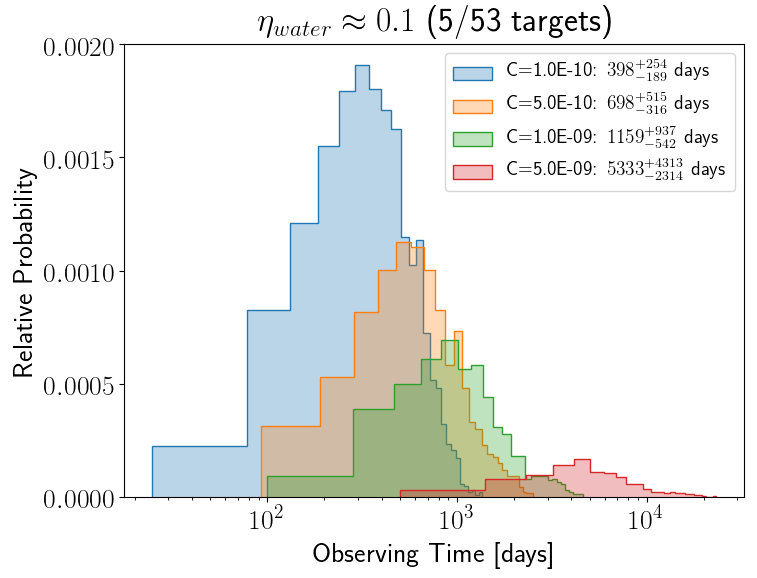

In [256]:
# Plot exposure time hist
fig, ax = plt.subplots(1, figsize = (8,6))
ax.set_xlabel("Observing Time [days]")
ax.set_ylabel("Relative Probability")
ax.set_title(r"$\eta_{water} \approx %.1f $ (%i/%i targets)" %(float(drmx.Ndraw)/float(drmx.NBIAS), drmx.Ndraw, drmx.NBIAS))

labels = []
handles = []

for i in range(len(contrasts)):
    
    label = "C=%.1E" %contrasts[i]
    color = "C%i" %i
    ctime_sum = t_totx[i,:] / 24.
    q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(ctime_sum)
    result = "$%i^{+%i}_{-%i}$" %(q_50, q_p, q_m)
    h = ax.hist(ctime_sum, bins = bins, alpha = .3, color = color, normed=True);
    h2 = ax.hist(ctime_sum, bins = bins, alpha = 1.0, histtype="step", color = color, normed=True);
    handles.append((h[2][0], h2[2][0]))
    #ax.axvline(q_50, color = "w", ls = "dashed")
    #ax.text(q_50, np.max(h[0]), result, color = color, ha = "center", va = "bottom", fontsize = 14)
    labels.append(label+": %s days" %result)
    
    q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(c_totx[i,:])
    print("$%i^{+%i}_{-%i}$ spectra in %i days" %(q_50, q_p, q_m, drmx.wantexp))
    
ax.set_xscale("log")
ax.legend(handles, labels, fontsize = 14)

fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_contrast_sensitivity_A.pdf", bbox_inches = "tight")

## Remake spectrum plot

In [24]:
# Create LUVOIR-A DRM
drmA = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = 0.2, 
    architecture = "A", 
    telescope_mods = {}
)

# Calculate table of exposure times
drmA.generate_exptime_table()

In [25]:
# Create LUVOIR-B DRM
drmB = spectroscopy.HEC_DRM(
    wantSNR = 8.5, 
    wantexp = 365., 
    Ahr_flat = 0.20,
    eta_int = 0.1, 
    bandwidth = 0.2, 
    architecture = "B", 
    telescope_mods = {}
)

# Calculate table of exposure times
drmB.generate_exptime_table()

In [26]:
# No Bands Removed
iremove = []
Xdraw = 2000

# Set RNG seed for random sampling
np.random.seed(seed = None)

t_totxA = np.zeros(Xdraw)
c_totxA = np.zeros(Xdraw)
countxA = np.zeros(Xdraw)
tpbpcxA = np.zeros((Xdraw, drmA.Ndraw, len(drmA.bp_names)))

t_totxB = np.zeros(Xdraw)
c_totxB = np.zeros(Xdraw)
countxB = np.zeros(Xdraw)
tpbpcxB = np.zeros((Xdraw, drmB.Ndraw, len(drmB.bp_names)))

# Run DRMs for Xdraw number of times
for x in range(Xdraw):
    
    t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmA.run_hec_drm(Ndraw=drmA.Ndraw, 
                                                                                                   verbose=False, 
                                                                                                   iremove=iremove, 
                                                                                                   wantexp_days=drmA.wantexp)
    t_totxA[x] = np.sum(t_tot_sort)
    c_totxA[x] = np.mean(c_tot_sort)
    countxA[x] = count_in_texp
    tpbpcxA[x,:,:] = tpbpcs_draws
    
    t_tot_sort, count_in_texp, c_tot_sort, tpbpcs_draws, t_sci_sort, t_ovr_sort = drmB.run_hec_drm(Ndraw=drmB.Ndraw, 
                                                                                                   verbose=False, 
                                                                                                   iremove=iremove, 
                                                                                                   wantexp_days=drmB.wantexp)
    t_totxB[x] = np.sum(t_tot_sort)
    c_totxB[x] = np.mean(c_tot_sort)
    countxB[x] = count_in_texp
    tpbpcxB[x,:,:] = tpbpcs_draws

In [269]:
# Set planet and star parameters for an Earth-Sun analog at 5pc
drmA.cn.planet.distance = 6.0
drmA.cn.planet.a = 1.0
drmA.cn.star.Rs = 1.0
drmA.cn.star.Teff = 5780.

"""
wantSNR_grid = np.array([wantSNR for i in range(len(bp_names))])
wantSNR_grid[0] = 1.0
wantSNR_grid[1] = 1.0
"""

output = drmA.complete_spectrum_time()

spectrum = output[2]

In [75]:
# Sum to get average time per bandpass
tmpA = np.nansum(tpbpcxA, axis=1).T
tmpB = np.nansum(tpbpcxB, axis=1).T

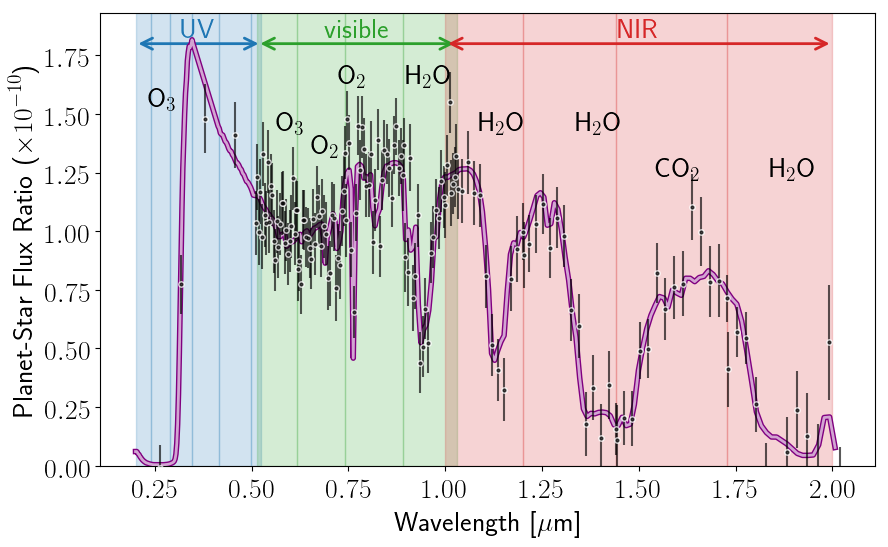

In [253]:
iremove = []
cc = ["C0", "C2", "C3"]
bp_names = drmA.bp_names
plot_boxes = False

fig, ax = plt.subplots(figsize = (10,6))

ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)")
for i in range(len(bp_names)):
    if i not in iremove:
        ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
        ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
        ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

drmA.cn.telescope.lammin = 0.2
drmA.cn.telescope.lammax = 2.0
drmA.cn.telescope.resolution = 140.
# Re-do count rate calcs for true Earth spectrum
drmA.cn.run_count_rates(spectroscopy.AHR, spectroscopy.LAMHR, spectroscopy.FSTAR)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "purple", zorder = 70, lw = 4.0, alpha = 1.)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "w", zorder = 70, lw = 2.0, alpha = 0.65)
ax.set_ylim(bottom=0.0)

# Label Molecules
ax.text(0.27, 1.55, "O$_3$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.6, 1.45, "O$_3$",   ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.69, 1.35, "O$_2$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.76, 1.65, "O$_2$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.96, 1.65, "H$_2$O", ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.15, 1.45, "H$_2$O", ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.4, 1.45, "H$_2$O",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.9, 1.25, "H$_2$O",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.6, 1.25, "CO$_2$",  ha = "center", va = "center", color = "k", zorder = 130)

yloc = 1.8
lammin_inst = drmA.bandpasses[0][0]
lammax_inst = drmA.bandpasses[5][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "UV"
color = cc[0]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

yloc = 1.8
lammin_inst = drmA.bandpasses[6][0]
lammax_inst = drmA.bandpasses[9][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "visible"
color = cc[1]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

yloc = 1.8
lammin_inst = drmA.bandpasses[10][0]
lammax_inst = drmA.bandpasses[13][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "NIR"
color = cc[2]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

if plot_boxes:

    ax2 = ax.twinx()
    
    """
    Xdraw = len(tpbpcs_draws_tots[0][0])

    # Transform quantities for boxplot
    tmp = [np.zeros((len(tpbpcs_draws_tots[i]), Xdraw)) for i in range(len(spectroscopy.CHANNELS))]
    for i in range(Xdraw):
        for j in range(tp):
            for k in range(len(tpbpcs_draws_tots[j])):
                tmp[j][k,i] = tpbpcs_draws_tots[j][k][i]
    """

    icount = 0
    for ichan in range(len(spectroscopy.CHANNELS)):
        
        data = []
        positions = []
        widths = []
        
        for j in range(len(bp_names[bp_chan == ichan])):
                
            data.append(tmp[icount,:])
            positions.append(np.mean(spectrum[0][icount]))
            widths.append(spectrum[0][icount][-1] - spectrum[0][icount][0] + np.mean(spectrum[1][icount][:]))
            color1 = cc[ichan]

            comp_str = "$%i \%%$" %(100.*frac_bias_bp[icount])
            comp_str2 = "$\mathbf{%i \%%}$" %(100.*frac_bias_bp[icount])
            #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
            #         ha = "center", va = "top", fontsize = 12, color = "w")
            ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
                     ha = "center", va = "top", fontsize = 12, color = color1)

            icount += 1

        positions = np.array(positions)
        widths = np.array(widths)
        bp1 = ax2.boxplot(data, sym = '', widths = widths, showfliers = False, 
                          boxprops = {"color" : color1, "alpha" : 0.5}, 
                          whiskerprops = {"color" : color1, "linewidth" : 2.0}, 
                          capprops = {"color" : color1, "linewidth" : 0.0}, 
                          medianprops = {"color" : "w", "linewidth" : 2.0}, 
                          patch_artist=True, positions = positions, whis = [5, 95]); 

        for patch in bp1['boxes']:
            patch.set_facecolor(color1)

    ax2.set_ylabel("Science Time [hrs]", labelpad = 22, rotation = 270)
    #ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
    ax2.set_yscale("log")

    ax2.set_xlabel("Wavelength [$\mu$m]")
    ax2.set_ylim(bottom = 0.0)

    ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xticklabels([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xlim(0.1, 2.0)
    #ax2.set_xlim(0.4, 1.0)

fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_spectrum_SNR8.5.pdf", bbox_inches = "tight")

(0.1, 2.0)

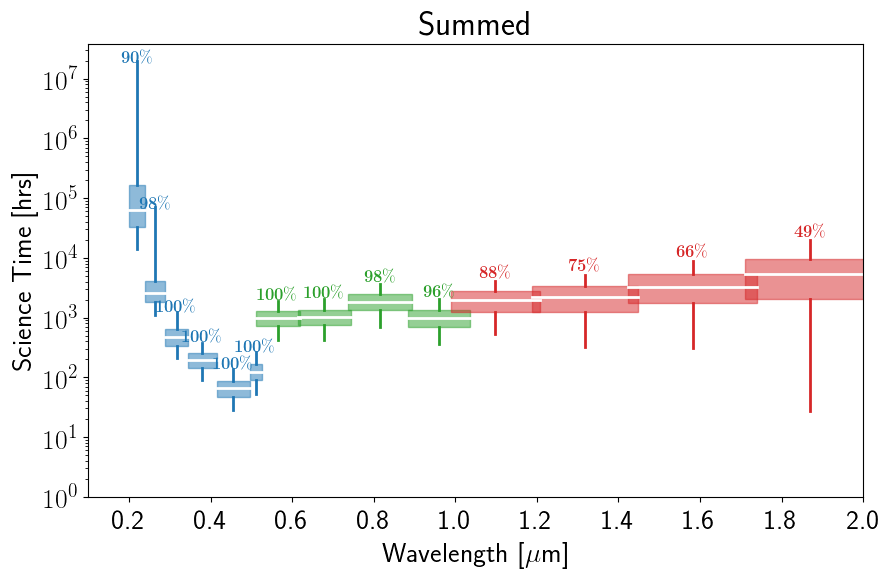

In [77]:
drm = drmA
tmp = tmpA

fig, ax2 = plt.subplots(figsize = (10,6))
ax2.set_title("Summed")
    
"""
Xdraw = len(tpbpcs_draws_tots[0][0])

# Transform quantities for boxplot
tmp = [np.zeros((len(tpbpcs_draws_tots[i]), Xdraw)) for i in range(len(spectroscopy.CHANNELS))]
for i in range(Xdraw):
    for j in range(tp):
        for k in range(len(tpbpcs_draws_tots[j])):
            tmp[j][k,i] = tpbpcs_draws_tots[j][k][i]
"""

icount = 0
for ichan in range(len(spectroscopy.CHANNELS)):

    data = []
    positions = []
    widths = []

    for j in range(len(drm.bp_names[drm.bp_chan == ichan])):

        data.append(tmp[icount,:])
        positions.append(np.mean(spectrum[0][icount]))
        widths.append(spectrum[0][icount][-1] - spectrum[0][icount][0] + np.mean(spectrum[1][icount][:]))
        color1 = cc[ichan]

        comp_str = "$%i \%%$" %(100.*drm.frac_bias_bp[icount])
        comp_str2 = "$\mathbf{%i \%%}$" %(100.*drm.frac_bias_bp[icount])
        #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
        #         ha = "center", va = "top", fontsize = 12, color = "w")
        ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
                 ha = "center", va = "top", fontsize = 12, color = color1)

        icount += 1

    positions = np.array(positions)
    widths = np.array(widths)
    bp1 = ax2.boxplot(data, sym = '', widths = widths, showfliers = False, 
                      boxprops = {"color" : color1, "alpha" : 0.5}, 
                      whiskerprops = {"color" : color1, "linewidth" : 2.0}, 
                      capprops = {"color" : color1, "linewidth" : 0.0}, 
                      medianprops = {"color" : "w", "linewidth" : 2.0}, 
                      patch_artist=True, positions = positions, whis = [5, 95]); 

    for patch in bp1['boxes']:
        patch.set_facecolor(color1)

ax2.set_ylabel("Science Time [hrs]")
#ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
ax2.set_yscale("log")

ax2.set_xlabel("Wavelength [$\mu$m]")
ax2.set_ylim(bottom = 1.0)

ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
ax2.set_xticklabels([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
ax2.set_xlim(0.1, 2.0)
#ax2.set_xlim(0.4, 1.0)

(0.1, 2.0)

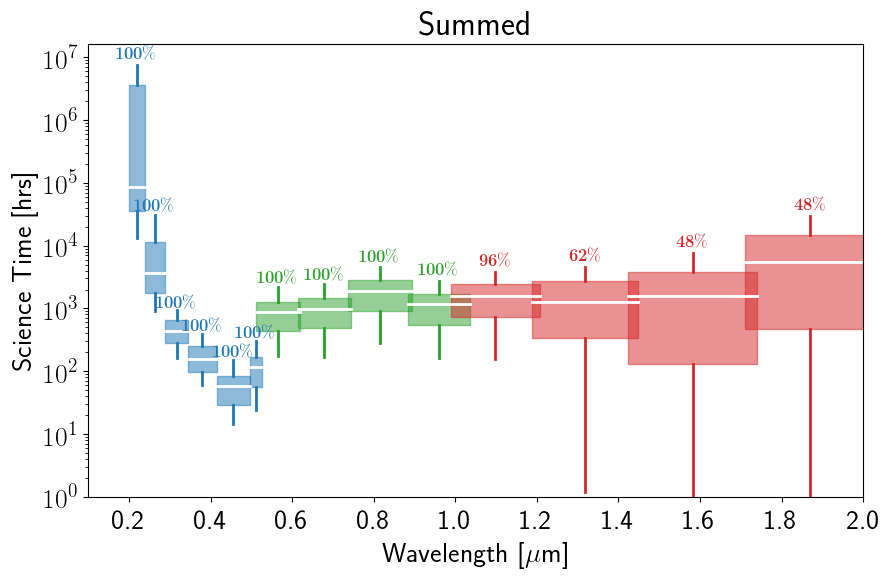

In [78]:
drm = drmB
tmp = tmpB

fig, ax2 = plt.subplots(figsize = (10,6))
ax2.set_title("Summed")
    
"""
Xdraw = len(tpbpcs_draws_tots[0][0])

# Transform quantities for boxplot
tmp = [np.zeros((len(tpbpcs_draws_tots[i]), Xdraw)) for i in range(len(spectroscopy.CHANNELS))]
for i in range(Xdraw):
    for j in range(tp):
        for k in range(len(tpbpcs_draws_tots[j])):
            tmp[j][k,i] = tpbpcs_draws_tots[j][k][i]
"""

icount = 0
for ichan in range(len(spectroscopy.CHANNELS)):

    data = []
    positions = []
    widths = []

    for j in range(len(drm.bp_names[drm.bp_chan == ichan])):

        data.append(tmp[icount,:])
        positions.append(np.mean(spectrum[0][icount]))
        widths.append(spectrum[0][icount][-1] - spectrum[0][icount][0] + np.mean(spectrum[1][icount][:]))
        color1 = cc[ichan]

        comp_str = "$%i \%%$" %(100.*drm.frac_bias_bp[icount])
        comp_str2 = "$\mathbf{%i \%%}$" %(100.*drm.frac_bias_bp[icount])
        #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
        #         ha = "center", va = "top", fontsize = 12, color = "w")
        ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
                 ha = "center", va = "top", fontsize = 12, color = color1)

        icount += 1

    positions = np.array(positions)
    widths = np.array(widths)
    bp1 = ax2.boxplot(data, sym = '', widths = widths, showfliers = False, 
                      boxprops = {"color" : color1, "alpha" : 0.5}, 
                      whiskerprops = {"color" : color1, "linewidth" : 2.0}, 
                      capprops = {"color" : color1, "linewidth" : 0.0}, 
                      medianprops = {"color" : "w", "linewidth" : 2.0}, 
                      patch_artist=True, positions = positions, whis = [5, 95]); 

    for patch in bp1['boxes']:
        patch.set_facecolor(color1)

ax2.set_ylabel("Science Time [hrs]")
#ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
ax2.set_yscale("log")

ax2.set_xlabel("Wavelength [$\mu$m]")
ax2.set_ylim(bottom = 1.0)

ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
ax2.set_xticklabels([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
ax2.set_xlim(0.1, 2.0)
#ax2.set_xlim(0.4, 1.0)

In [108]:
tmpA = drmA.tpbpcs_rect.T
tmpB = drmB.tpbpcs_rect.T

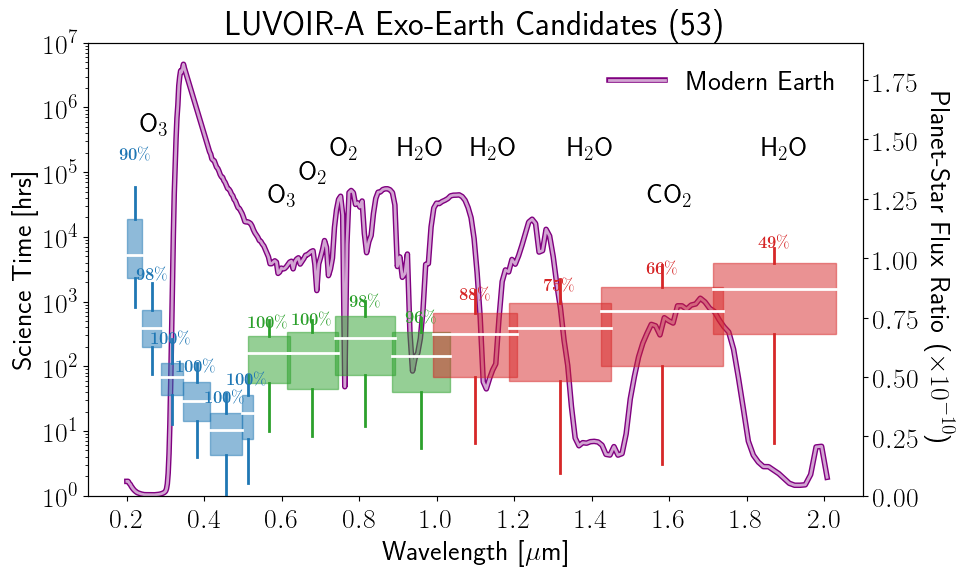

In [254]:
drm = drmA
tmp = tmpA

plot_earth = True

fig, ax2 = plt.subplots(figsize = (10,6))
ax2.set_title("LUVOIR-A Exo-Earth Candidates (%i)" %drm.NBIAS)

icount = 0
for ichan in range(len(spectroscopy.CHANNELS)):

    data = []
    positions = []
    widths = []

    for j in range(len(drm.bp_names[drm.bp_chan == ichan])):
        
        nanmask = np.isfinite(tmp[icount,:])

        data.append(tmp[icount,nanmask])
        positions.append(np.mean(spectrum[0][icount]))
        widths.append(spectrum[0][icount][-1] - spectrum[0][icount][0] + np.mean(spectrum[1][icount][:]))
        color1 = cc[ichan]

        comp_str = "$%i \%%$" %(100.*drm.frac_bias_bp[icount])
        comp_str2 = "$\mathbf{%i \%%}$" %(100.*drm.frac_bias_bp[icount])
        #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
        #         ha = "center", va = "top", fontsize = 12, color = "w")
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(tmp[icount,nanmask], intvls=[0.05, 0.5, 0.97])
        ax2.text(positions[j], q_h, comp_str2, 
                 ha = "center", va = "top", fontsize = 12, color = color1)
        
        #ax2.plot(drm.bandpasses[icount], [q_50, q_50], color = color1, zorder = 120, ls = "dashed")
        
        icount += 1

    positions = np.array(positions)
    widths = np.array(widths)
    bp1 = ax2.boxplot(data, sym = '', widths = widths, showfliers = False, 
                      boxprops = {"color" : color1, "alpha" : 0.5}, 
                      whiskerprops = {"color" : color1, "linewidth" : 2.0}, 
                      capprops = {"color" : color1, "linewidth" : 0.0}, 
                      medianprops = {"color" : "w", "linewidth" : 2.0}, 
                      patch_artist=True, positions = positions, whis = [5, 95]); 

    for patch in bp1['boxes']:
        patch.set_facecolor(color1)

if plot_earth: 
    
    ax = ax2.twinx()
    ax2.set_zorder(100)
    ax2.patch.set_visible(False)

    ax.set_xlabel("Wavelength [$\mu$m]")
    ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)", rotation = 270, labelpad = 25)
    for i in range(len(bp_names)):
        if i not in iremove:
            pass
            #ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
            #ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
            #ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

    drmA.cn.telescope.lammin = 0.2
    drmA.cn.telescope.lammax = 2.0
    drmA.cn.telescope.resolution = 140.
    # Re-do count rate calcs for true Earth spectrum
    drmA.cn.run_count_rates(spectroscopy.AHR, spectroscopy.LAMHR, spectroscopy.FSTAR)
    l1, = ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "purple", zorder = 0, lw = 4.0, alpha = 1.)
    l2, = ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "w", zorder = 0, lw = 2.0, alpha = 0.65)
    ax.set_ylim(bottom=0.0)
    ax.legend([(l1, l2)], [("Modern Earth")], framealpha = 0.0)
    
    # Label Molecules
    ax.text(0.27, 1.55, "O$_3$", ha = "center", va = "center")
    ax.text(0.6, 1.25, "O$_3$", ha = "center", va = "center")
    ax.text(0.68, 1.35, "O$_2$", ha = "center", va = "center")
    ax.text(0.76, 1.45, "O$_2$", ha = "center", va = "center")
    ax.text(0.96, 1.45, "H$_2$O", ha = "center", va = "center")
    ax.text(1.15, 1.45, "H$_2$O", ha = "center", va = "center")
    ax.text(1.4, 1.45, "H$_2$O", ha = "center", va = "center")
    ax.text(1.9, 1.45, "H$_2$O", ha = "center", va = "center")
    ax.text(1.6, 1.25, "CO$_2$", ha = "center", va = "center")
        
ax2.set_ylabel("Science Time [hrs]")
#ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
ax2.set_yscale("log")

ax2.set_xlabel("Wavelength [$\mu$m]")
ax2.set_ylim(bottom = 1.0, top = 1e7)

ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
ax2.set_xticklabels(["$0.2$", "$0.4$", "$0.6$", "$0.8$", "$1.0$", "$1.2$", "$1.4$", "$1.6$", "$1.8$", "$2.0$"])
ax2.set_xlim(0.1, 2.1)
#ax2.set_xlim(0.4, 1.0)

fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_bp_science_time_%s.pdf" %drm.architecture, bbox_inches = "tight")

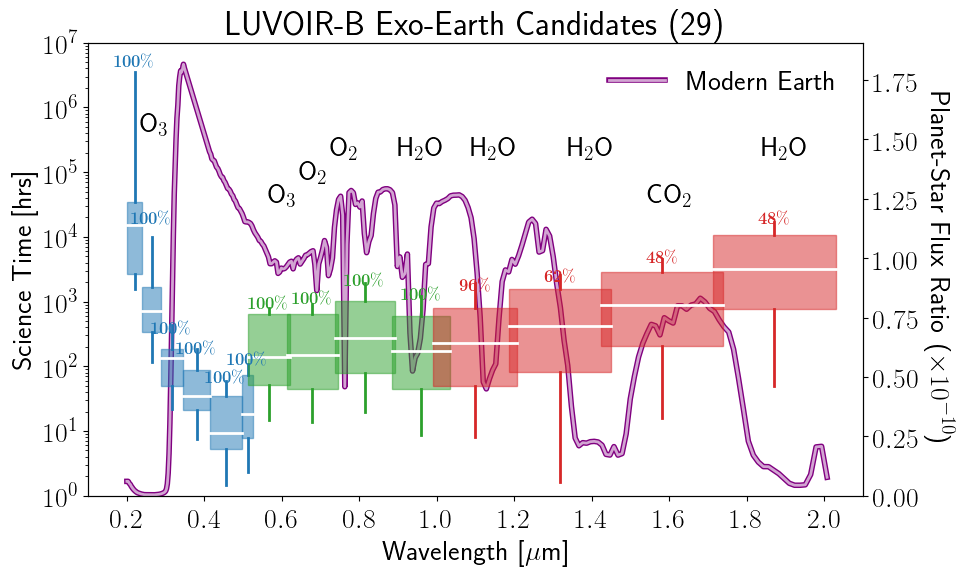

In [255]:
drm = drmB
tmp = tmpB

plot_earth = True

fig, ax2 = plt.subplots(figsize = (10,6))
ax2.set_title("LUVOIR-B Exo-Earth Candidates (%i)" %drm.NBIAS)

icount = 0
for ichan in range(len(spectroscopy.CHANNELS)):

    data = []
    positions = []
    widths = []

    for j in range(len(drm.bp_names[drm.bp_chan == ichan])):
        
        nanmask = np.isfinite(tmp[icount,:])

        data.append(tmp[icount,nanmask])
        positions.append(np.mean(spectrum[0][icount]))
        widths.append(spectrum[0][icount][-1] - spectrum[0][icount][0] + np.mean(spectrum[1][icount][:]))
        color1 = cc[ichan]

        comp_str = "$%i \%%$" %(100.*drm.frac_bias_bp[icount])
        comp_str2 = "$\mathbf{%i \%%}$" %(100.*drm.frac_bias_bp[icount])
        #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
        #         ha = "center", va = "top", fontsize = 12, color = "w")
        q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(tmp[icount,nanmask], intvls=[0.05, 0.5, 0.98])
        ax2.text(positions[j], q_h, comp_str2, 
                 ha = "center", va = "top", fontsize = 12, color = color1)

        icount += 1

    positions = np.array(positions)
    widths = np.array(widths)
    bp1 = ax2.boxplot(data, sym = '', widths = widths, showfliers = False, 
                      boxprops = {"color" : color1, "alpha" : 0.5}, 
                      whiskerprops = {"color" : color1, "linewidth" : 2.0}, 
                      capprops = {"color" : color1, "linewidth" : 0.0}, 
                      medianprops = {"color" : "w", "linewidth" : 2.0}, 
                      patch_artist=True, positions = positions, whis = [5, 95]); 

    for patch in bp1['boxes']:
        patch.set_facecolor(color1)

if plot_earth: 
    
    ax = ax2.twinx()
    ax2.set_zorder(100)
    ax2.patch.set_visible(False)

    ax.set_xlabel("Wavelength [$\mu$m]")
    ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)", rotation = 270, labelpad = 25)
    for i in range(len(bp_names)):
        if i not in iremove:
            pass
            #ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
            #ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
            #ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

    drmA.cn.telescope.lammin = 0.2
    drmA.cn.telescope.lammax = 2.0
    drmA.cn.telescope.resolution = 140.
    # Re-do count rate calcs for true Earth spectrum
    drmA.cn.run_count_rates(spectroscopy.AHR, spectroscopy.LAMHR, spectroscopy.FSTAR)
    l1, = ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "purple", zorder = 0, lw = 4.0, alpha = 1.)
    l2, = ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "w", zorder = 0, lw = 2.0, alpha = 0.65)
    ax.set_ylim(bottom=0.0)
    ax.legend([(l1, l2)], [("Modern Earth")], framealpha = 0.0)
    
    # Label Molecules
    ax.text(0.27, 1.55, "O$_3$", ha = "center", va = "center")
    ax.text(0.6, 1.25, "O$_3$", ha = "center", va = "center")
    ax.text(0.68, 1.35, "O$_2$", ha = "center", va = "center")
    ax.text(0.76, 1.45, "O$_2$", ha = "center", va = "center")
    ax.text(0.96, 1.45, "H$_2$O", ha = "center", va = "center")
    ax.text(1.15, 1.45, "H$_2$O", ha = "center", va = "center")
    ax.text(1.4, 1.45, "H$_2$O", ha = "center", va = "center")
    ax.text(1.9, 1.45, "H$_2$O", ha = "center", va = "center")
    ax.text(1.6, 1.25, "CO$_2$", ha = "center", va = "center")
        
ax2.set_ylabel("Science Time [hrs]")
#ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
ax2.set_yscale("log")

ax2.set_xlabel("Wavelength [$\mu$m]")
ax2.set_ylim(bottom = 1.0, top = 1e7)

ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
ax2.set_xticklabels(["$0.2$", "$0.4$", "$0.6$", "$0.8$", "$1.0$", "$1.2$", "$1.4$", "$1.6$", "$1.8$", "$2.0$"])
ax2.set_xlim(0.1, 2.1)
#ax2.set_xlim(0.4, 1.0)

fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_bp_science_time_%s.pdf" %drm.architecture, bbox_inches = "tight")

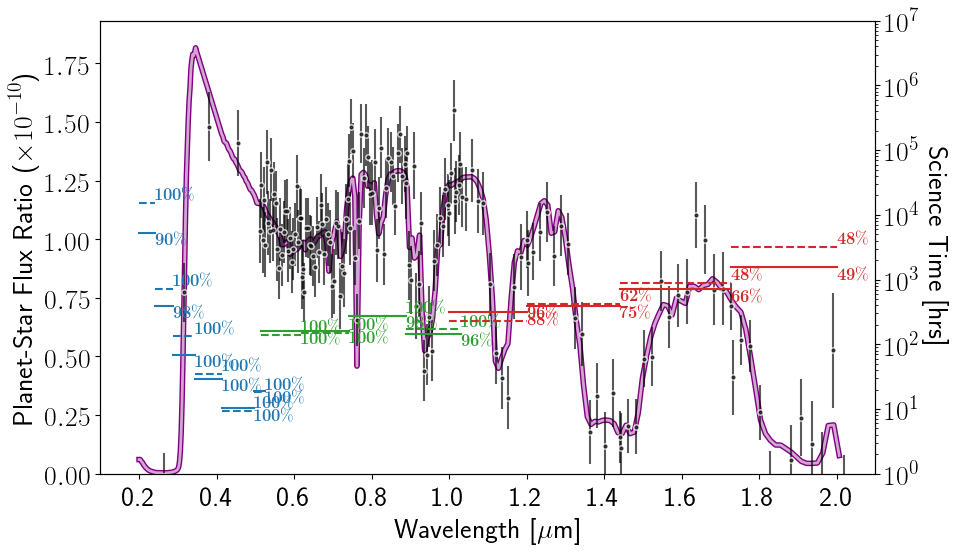

In [173]:
iremove = []
cc = ["C0", "C2", "C3"]
bp_names = drmA.bp_names
plot_lines = True

fig, ax = plt.subplots(figsize = (10,6))

ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)")
for i in range(len(bp_names)):
    if i not in iremove:
        ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
        ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
        #ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

drmA.cn.telescope.lammin = 0.2
drmA.cn.telescope.lammax = 2.0
drmA.cn.telescope.resolution = 140.
# Re-do count rate calcs for true Earth spectrum
drmA.cn.run_count_rates(spectroscopy.AHR, spectroscopy.LAMHR, spectroscopy.FSTAR)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "purple", zorder = 70, lw = 4.0, alpha = 1.)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "w", zorder = 70, lw = 2.0, alpha = 0.65)
ax.set_ylim(bottom=0.0)
            
if plot_lines:

    ax2 = ax.twinx()

    icount = 0
    for ichan in range(len(spectroscopy.CHANNELS)):

        data = []
        positions = []
        widths = []

        for j in range(len(drmA.bp_names[drmA.bp_chan == ichan])):
            
            #"""
            drm = drmA
            tmp = tmpA
            nanmask = np.isfinite(tmp[icount,:])
            color1 = cc[ichan]
            comp_str = "$%i \%%$" %(100.*drm.frac_bias_bp[icount])
            comp_str2 = "$\mathbf{%i \%%}$" %(100.*drm.frac_bias_bp[icount])
            #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
            #         ha = "center", va = "top", fontsize = 12, color = "w")
            q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(tmp[icount,nanmask], intvls=[0.25, 0.5, 0.75])
            ax2.text(drm.bandpasses[icount][1], q_50, comp_str2, 
                     ha = "left", va = "top", fontsize = 12, color = color1)
            ax2.plot(drm.bandpasses[icount], [q_50, q_50], color = color1, zorder = 120)
            #"""
            
            #"""
            drm = drmB
            tmp = tmpB
            nanmask = np.isfinite(tmp[icount,:])
            color1 = cc[ichan]
            comp_str = "$%i \%%$" %(100.*drm.frac_bias_bp[icount])
            comp_str2 = "$\mathbf{%i \%%}$" %(100.*drm.frac_bias_bp[icount])
            #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
            #         ha = "center", va = "top", fontsize = 12, color = "w")
            q_l, q_50, q_h, q_m, q_p = spectroscopy.nsig_intervals(tmp[icount,nanmask], intvls=[0.25, 0.5, 0.75])
            ax2.text(drm.bandpasses[icount][1], q_50, comp_str2,
                     ha = "left", va = "bottom", fontsize = 12, color = color1)
            ax2.plot(drm.bandpasses[icount], [q_50, q_50], color = color1, zorder = 120, ls = "dashed")
            #"""

            icount += 1
        

    ax2.set_ylabel("Science Time [hrs]", labelpad = 22, rotation = 270)
    #ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
    ax2.set_yscale("log")

    ax2.set_xlabel("Wavelength [$\mu$m]")
    ax2.set_ylim(bottom = 1.0, top = 1e7)

    ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xticklabels([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xlim(0.1, 2.1)
    #ax2.set_xlim(0.4, 1.0)

#fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_arch%s_test.pdf" %architecture, bbox_inches = "tight")

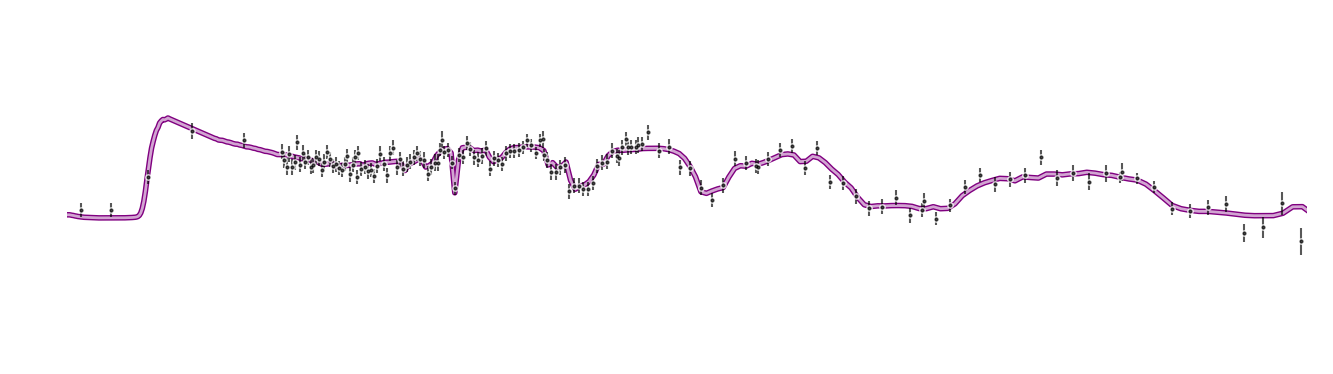

In [271]:
iremove = []
cc = ["C0", "C2", "C3"]
bp_names = drmA.bp_names

fig, ax = plt.subplots(figsize = (16,2))

ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)")
for i in range(len(bp_names)):
    if i not in iremove:
        ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
        ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
        #ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

drmA.cn.telescope.lammin = 0.2
drmA.cn.telescope.lammax = 2.0
drmA.cn.telescope.resolution = 140.
# Re-do count rate calcs for true Earth spectrum
drmA.cn.run_count_rates(spectroscopy.AHR, spectroscopy.LAMHR, spectroscopy.FSTAR)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "purple", zorder = 70, lw = 4.0, alpha = 1.)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "w", zorder = 70, lw = 2.0, alpha = 0.65)
#ax.set_ylim(bottom=0.0)
ax.set_xlim(drmA.cn.telescope.lammin, drmA.cn.telescope.lammax)

ax.set_axis_off()

fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/fancy_spectrum.pdf", bbox_inches = "tight", facecolor = "none")

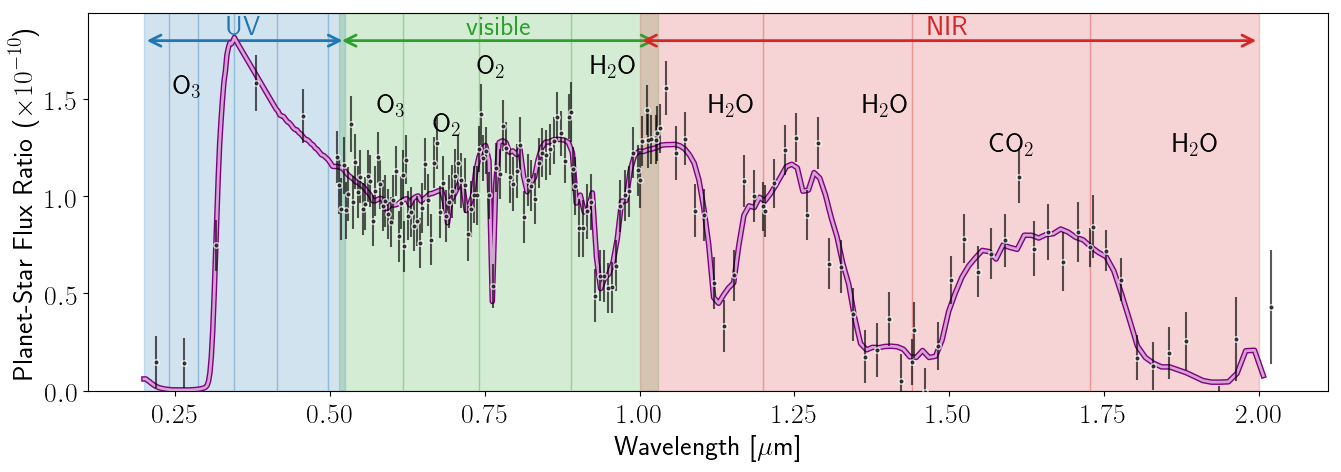

In [273]:
iremove = []
cc = ["C0", "C2", "C3"]
bp_names = drmA.bp_names
plot_boxes = False

fig, ax = plt.subplots(figsize = (16,5))

ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel(r"Planet-Star Flux Ratio ($\times 10^{-10}$)")
for i in range(len(bp_names)):
    if i not in iremove:
        ax.plot(spectrum[0][i], 1e10*spectrum[3][i], "o", ms = 4.0, alpha = 0.65, color = "w", zorder = 80)
        ax.errorbar(spectrum[0][i], 1e10*spectrum[3][i], yerr=1e10*spectrum[4][i], fmt = "o", ms = 2.0, alpha = 0.65, color = "k", zorder = 80)
        ax.axvspan(drmA.bandpasses[i][0], drmA.bandpasses[i][1], alpha = 0.2, color = cc[drmA.bp_chan[i]])

drmA.cn.telescope.lammin = 0.2
drmA.cn.telescope.lammax = 2.0
drmA.cn.telescope.resolution = 140.
# Re-do count rate calcs for true Earth spectrum
drmA.cn.run_count_rates(spectroscopy.AHR, spectroscopy.LAMHR, spectroscopy.FSTAR)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "purple", zorder = 70, lw = 4.0, alpha = 1.)
ax.plot(drmA.cn.lam, 1e10*drmA.cn.Cratio, color = "w", zorder = 70, lw = 2.0, alpha = 0.65)
ax.set_ylim(bottom=0.0)

# Label Molecules
ax.text(0.27, 1.55, "O$_3$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.6, 1.45, "O$_3$",   ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.69, 1.35, "O$_2$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.76, 1.65, "O$_2$",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(0.96, 1.65, "H$_2$O", ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.15, 1.45, "H$_2$O", ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.4, 1.45, "H$_2$O",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.9, 1.25, "H$_2$O",  ha = "center", va = "center", color = "k", zorder = 130)
ax.text(1.6, 1.25, "CO$_2$",  ha = "center", va = "center", color = "k", zorder = 130)

yloc = 1.8
lammin_inst = drmA.bandpasses[0][0]
lammax_inst = drmA.bandpasses[5][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "UV"
color = cc[0]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

yloc = 1.8
lammin_inst = drmA.bandpasses[6][0]
lammax_inst = drmA.bandpasses[9][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "visible"
color = cc[1]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

yloc = 1.8
lammin_inst = drmA.bandpasses[10][0]
lammax_inst = drmA.bandpasses[13][1]
xloc = (lammax_inst + lammin_inst) / 2
name = "NIR"
color = cc[2]
bbox_fc = "w"
ax.annotate(s='', xy=(lammin_inst,yloc), xytext=(lammax_inst,yloc), arrowprops=dict(arrowstyle='<->', color=color, lw = 2.0), zorder=2)
ax.text(xloc, yloc, name, ha="center", va="bottom", color=color, zorder=99)#, bbox=dict(boxstyle="square", fc=bbox_fc, ec="none", zorder=2))

if plot_boxes:

    ax2 = ax.twinx()
    
    """
    Xdraw = len(tpbpcs_draws_tots[0][0])

    # Transform quantities for boxplot
    tmp = [np.zeros((len(tpbpcs_draws_tots[i]), Xdraw)) for i in range(len(spectroscopy.CHANNELS))]
    for i in range(Xdraw):
        for j in range(tp):
            for k in range(len(tpbpcs_draws_tots[j])):
                tmp[j][k,i] = tpbpcs_draws_tots[j][k][i]
    """

    icount = 0
    for ichan in range(len(spectroscopy.CHANNELS)):
        
        data = []
        positions = []
        widths = []
        
        for j in range(len(bp_names[bp_chan == ichan])):
                
            data.append(tmp[icount,:])
            positions.append(np.mean(spectrum[0][icount]))
            widths.append(spectrum[0][icount][-1] - spectrum[0][icount][0] + np.mean(spectrum[1][icount][:]))
            color1 = cc[ichan]

            comp_str = "$%i \%%$" %(100.*frac_bias_bp[icount])
            comp_str2 = "$\mathbf{%i \%%}$" %(100.*frac_bias_bp[icount])
            #ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
            #         ha = "center", va = "top", fontsize = 12, color = "w")
            ax2.text(positions[j], np.median(tmp[icount,:]) + 5.*np.std(tmp[icount,:]), comp_str2, 
                     ha = "center", va = "top", fontsize = 12, color = color1)

            icount += 1

        positions = np.array(positions)
        widths = np.array(widths)
        bp1 = ax2.boxplot(data, sym = '', widths = widths, showfliers = False, 
                          boxprops = {"color" : color1, "alpha" : 0.5}, 
                          whiskerprops = {"color" : color1, "linewidth" : 2.0}, 
                          capprops = {"color" : color1, "linewidth" : 0.0}, 
                          medianprops = {"color" : "w", "linewidth" : 2.0}, 
                          patch_artist=True, positions = positions, whis = [5, 95]); 

        for patch in bp1['boxes']:
            patch.set_facecolor(color1)

    ax2.set_ylabel("Science Time [hrs]", labelpad = 22, rotation = 270)
    #ax2.set_title(r"All %i targets (S/N$\approx$%i)" %(Ndraw, wantSNR))
    ax2.set_yscale("log")

    ax2.set_xlabel("Wavelength [$\mu$m]")
    ax2.set_ylim(bottom = 0.0)

    ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xticklabels([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
    ax2.set_xlim(0.1, 2.0)
    #ax2.set_xlim(0.4, 1.0)

fig.savefig("/Users/Jake/Dropbox/Astronomy/UW/Astrobio/Research Rotation/LUVOIR/figures/drm_spectrum_SNR8.5_wide.pdf", bbox_inches = "tight")